In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import expon
from scipy.optimize import curve_fit

In [2]:
def iteration(samples):
    a, b = random.sample(samples, 2)  # directly sample 2 distinct values
    upper = max(a, b)
    lower = min(a, b)
    return upper, lower, (upper - lower)

def game(low, upp):
    arr = list(range(low, upp + 1))
    while len(arr) != 1:
        a, b, c = iteration(arr)
        arr.remove(a)  # remove elements directly
        arr.remove(b)
        arr.append(c)
    return arr[0]

In [3]:
## Testing function
result = game(1, 2024)
print("Final result:", result)

Final result: 4


In [4]:
### Testing For Mulitple Outcomes
print('Outcome 1 = ',game(0,2024))
print('Outcome 2 = ',game(0,2024))

Outcome 1 =  1150
Outcome 2 =  312


In [5]:
## simulating game and plotting results functions
def game_simulation(n_sim, low, upp):
    outcomes = []
    for i in range(0, n_sim):
        outcomes.append(game(low,upp))
    return outcomes

def results_plot(data):
    my_bins = range(1, max(data) + 1)
    plt.figure(figsize = (12,8))
    plt.hist(data, bins=my_bins, align='left')
    plt.xlabel('Outcomes', size=17)
    plt.ylabel('Frequency', size=17)
    plt.title('Histogram of 10,000 Simulations of the Game', size=17)
    plt.show()

In [6]:
##  Testing for odd outcomes with |H_0|=2024
results = game_simulation(100,0,2024)
my_bool = True
for num in results:
    if num % 2 != 0:
        ny_bool = False
    else:
        pass
print('All outcomes in this sample are even:',my_bool)

All outcomes in this sample are even: True


In [7]:
## Simulating game
n = 10000
lower = 1
upper = 2024
large_results = game_simulation(n,lower, upper)

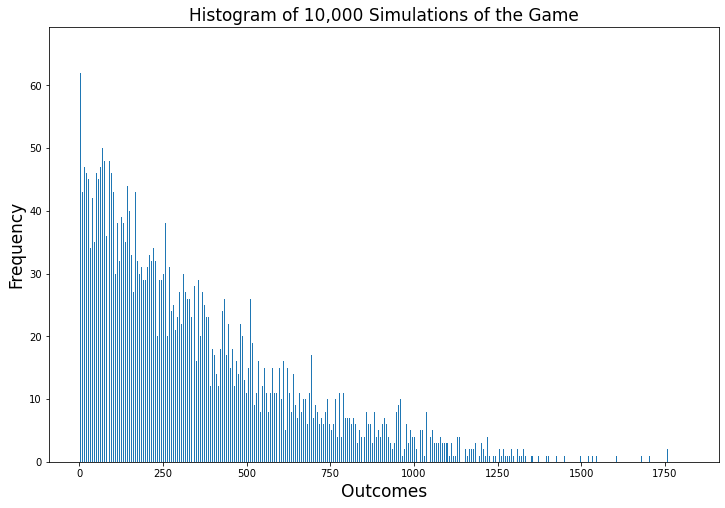

In [8]:
# Plotting Results
results_plot(large_results)

In [9]:
#Testing for odd numbers
my_bool = True
for num in large_results:
    if num % 2 != 0:
        ny_bool = False
    else:
        pass
print('All outcomes in this sample are even:',my_bool)

All outcomes in this sample are even: True


In [10]:
# Finding the average outcome value for |H_0|=2024 over 10,000 simulations
mean = sum(large_results)/len(large_results)
print('The avergae outcome of the game for |H_0|=2024 is =', mean)

The avergae outcome of the game for |H_0|=2024 is = 339.3508


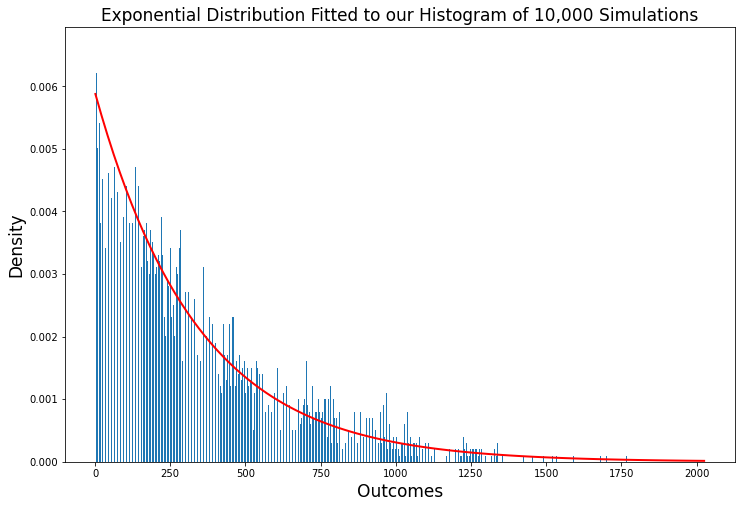

In [11]:
# Fitting a distribution to the histogram and plotting fit
parameters = expon.fit(large_results)
x = np.linspace(lower, upper+1, 101)
plt.figure(figsize = (12,8))
plt.hist(large_results, bins=range(1, max(large_results) + 1), density=True)
plt.plot(x, 2*expon.pdf(x, *parameters), 'r', lw=2)
plt.xlabel('Outcomes', size=17)
plt.ylabel('Density', size=17)
plt.title('Exponential Distribution Fitted to our Histogram of 10,000 Simulations', size=17)
plt.show()

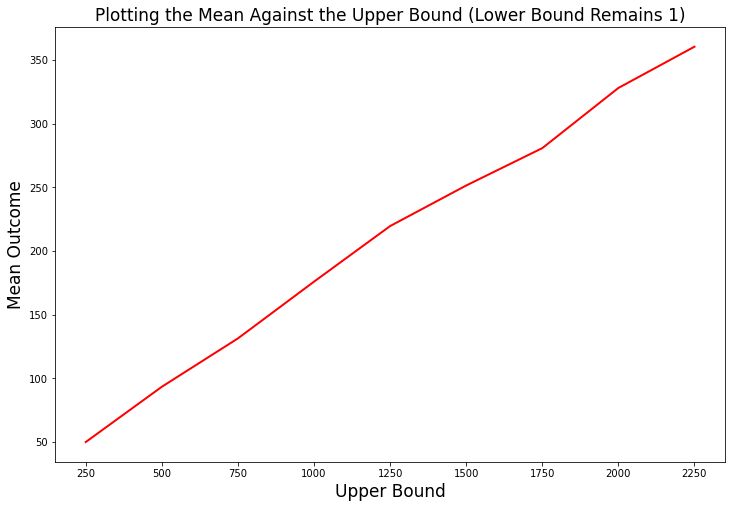

In [12]:
# Simulating for different H_0s and finding as plotting their mean
bounds = [250,500,750,1000,1250,1500,1750,2000,2250]
averages = []
for i in bounds:
    data = game_simulation(500, 1, i)
    my_mean = sum(data)/len(data)
    averages.append(my_mean)

plt.figure(figsize=(12,8))
plt.plot(bounds, averages, 'r', lw=2)
plt.xlabel('Upper Bound', size=17)
plt.ylabel('Mean Outcome', size=17)
plt.title('Plotting the Mean Against the Upper Bound (Lower Bound Remains 1)', size=17)
plt.show()